# Example BIU Usage

BIU is a toolkit I made to gather various datasets and tools that I regularly use.
This way, I never need to worry about managing the data in files on my computer, I can simply use this package which has wrapper functions for common queries I perform on the datasets.

Currently, it allows me to 

 * Download a number of datasets on the fly - when they are needed (and sub-components of these datasets)
 * Dynamically load datasets when they are needed (They do not consume memory until a query is performed upon them
 * Query these datasets
 * Handle various data formats:
   * FASTA
   * GFF3
   * GAF (GO annotation file)
   * SQLite databases
   * VCF (using the pyvcf package)
 * Map IDs between various indexing methods

In [10]:
import biu as biu
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Change some default settings
We can change the default location for all data storage, and turn off debug messages

In [2]:
where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)
print("We set the default data directory to be: '%s'" % biu.config.settings.getWhere())

biu.config.settings.setDebugState(False)
print("Turned OFF debug messages")
biu.config.settings.setDebugState(True)
print("Turned ON debug messages")

We set the default data directory to be: '/exports/molepi/tgehrmann/data/'
Turned OFF debug messages
Turned ON debug messages


## List the available datasets

In [3]:
biu.db.list()

Available databases:
 * BBMRI
 * CADD
 * ClinVar
 * Cosmic
 * GO
 * GTeX
 * Genomes
 * Gnomad
 * HAGR
 * KEGG
 * LLS
 * Reactome
 * UniProt


## Open a genome object and load the GFF file

Load the genome, and get the GFF file and parse it

In [4]:
hg = biu.db.Genome("Ensembl_91")
print(hg)

Genome object
 Where: /exports/molepi/tgehrmann/data
 Genome : Ensembl_91
 Objects:
  * [ ] gff
  * [ ] cds
  * [ ] aa
  * [ ] genome[1]
  * [ ] genome[2]
  * [ ] genome[3]
  * [ ] genome[4]
  * [ ] genome[5]
  * [ ] genome[6]
  * [ ] genome[7]
  * [ ] genome[8]
  * [ ] genome[9]
  * [ ] genome[10]
  * [ ] genome[11]
  * [ ] genome[12]
  * [ ] genome[13]
  * [ ] genome[14]
  * [ ] genome[15]
  * [ ] genome[16]
  * [ ] genome[17]
  * [ ] genome[18]
  * [ ] genome[19]
  * [ ] genome[20]
  * [ ] genome[21]
  * [ ] genome[22]
  * [ ] genome[MT]
  * [ ] genome[X]
  * [ ] genome[Y]
 Files:
  * [X] gff : /exports/molepi/tgehrmann/data/genome_Ensembl_91/genome.gff3
  * [ ] cds : /exports/molepi/tgehrmann/data/genome_Ensembl_91/cds.fa
  * [X] aa : /exports/molepi/tgehrmann/data/genome_Ensembl_91/aa.fa
  * [ ] chr_1 : /exports/molepi/tgehrmann/data/genome_Ensembl_91/chr1.fa.gz
  * [ ] chr_2 : /exports/molepi/tgehrmann/data/genome_Ensembl_91/chr2.fa.gz
  * [ ] chr_3 : /exports/molepi/tgehrmann/da

In [5]:
seqid = list(hg.aa.entries.keys())[1000]
print('>%s\n%s' % (seqid, hg.aa[seqid]))

D: Initializing the object NOW


>ENSP00000363040.3
MNGGAERAMRSLPSLGGLALLCCAAAAAAAAVASAASAGNVTGGGGAAGQVDASPGPGLRGEPSHPFPRATAPTAQAPRTGPPRATVHRPLAATSPAQSPETTPLWATAGPSSTTFQAPLGPSPTTPPAAERTSTTSQAPTRPAPTTLSTTTGPAPTTPVATTVPAPTTPRTPTPDLPSSSNSSVLPTPPATEAPSSPPPEYVCNCSVVGSLNVNRCNQTTGQCECRPGYQGLHCETCKEGFYLNYTSGLCQPCDCSPHGALSIPCNSSGKCQCKVGVIGSICDRCQDGYYGFSKNGCLPCQCNNRSASCDALTGACLNCQENSKGNHCEECKEGFYQSPDATKECLRCPCSAVTSTGSCSIKSSELEPECDQCKDGYIGPNCNKCENGYYNFDSICRKCQCHGHVDPVKTPKICKPESGECINCLHNTTGFWCENCLEGYVHDLEGNCIKKEVILPTPEGSTILVSNASLTTSVPTPVINSTFTPTTLQTIFSVSTSENSTSALADVSWTQFNIIILTVIIIVVVLLMGFVGAVYMYREYQNRKLNAPFWTIELKEDNISFSSYHDSIPNADVSGLLEDDGNEVAPNGQLTLTTPIHNYKA


In [6]:
print(hg.gff)

D: Initializing the object NOW


GFF3 object
 Where: /exports/molepi/tgehrmann/data/genome_Ensembl_91/genome.gff3
 Entries: 2636880
 Top level statistics:
  * chromosome : 25
  * pseudogene : 14627
  * ncRNA_gene : 22239
  * gene : 21436
  * supercontig : 169



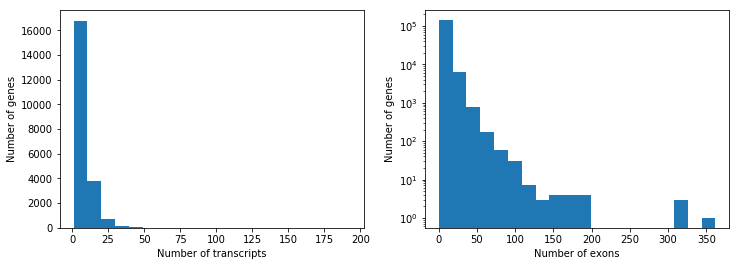

In [7]:
nTranscriptsPerGene = []
nExonsPerTranscript = []
for gene in hg.gff.topLevel['gene']:
    transcripts = [ cid for (i, cid) in hg.gff.index[gene][1] ]
    nTranscriptsPerGene.append(len(transcripts))
    for trans in transcripts:
        nExonsPerTranscript.append(len(hg.gff.index[trans][1]))
    #efor
#efor

fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()
axes[0].hist(nTranscriptsPerGene, bins=20)
axes[0].set_xlabel("Number of transcripts")
axes[0].set_ylabel("Number of genes")
axes[1].hist(nExonsPerTranscript, bins=20, log=True)
axes[1].set_xlabel("Number of exons")
axes[1].set_ylabel("Number of genes")
plt.show()

## Access the Uniprot database

In [8]:
uniprot = biu.db.UniProt("human")
print(uniprot)

UniProt object
 Where: /exports/molepi/tgehrmann/data
 Version: human
 Objects:
  * [ ] annots
 Files:
  * [X] gff : /exports/molepi/tgehrmann/data/uniprot_human/uniprot_human.gff3



In [9]:
for result in uniprot.getProteinDomains('P42345'):
    print(result)

D: Initializing the object NOW


gff3Entry(seqid='P42345', source='UniProtKB', feature='Domain', start=1382, end=1982, score='.', strand='.', phase='.', attr={'Note': 'FAT', 'Ontology_term': 'ECO:0000255', 'evidence': 'ECO:0000255|PROSITE-ProRule:PRU00534'})
gff3Entry(seqid='P42345', source='UniProtKB', feature='Domain', start=2182, end=2516, score='.', strand='.', phase='.', attr={'Note': 'PI3K/PI4K', 'Ontology_term': 'ECO:0000255', 'evidence': 'ECO:0000255|PROSITE-ProRule:PRU00269'})
gff3Entry(seqid='P42345', source='UniProtKB', feature='Domain', start=2517, end=2549, score='.', strand='.', phase='.', attr={'Note': 'FATC', 'Ontology_term': 'ECO:0000255,ECO:0000255', 'evidence': 'ECO:0000255|PROSITE-ProRule:PRU00534,ECO:0000255|PROSITE-ProRule:PRU00535'})


## Access the ClinVar database

In [10]:
cv = biu.db.ClinVar("GRCh37")
print(cv)

ClinVar object
 Where: /exports/molepi/tgehrmann/data
 Version: GRCh37
 Objects:
  * [ ] summary
  * [ ] vcf
 Files:
  * [X] vcf : /exports/molepi/tgehrmann/data/clinvar_GRCh37/clinVar.vcf.bgz
  * [X] vcf_tbi : /exports/molepi/tgehrmann/data/clinvar_GRCh37/clinVar.vcf.bgz.tbi
  * [X] sum : /exports/molepi/tgehrmann/data/clinvar_GRCh37/summary.tsv.bgz
  * [X] sum_tbi : /exports/molepi/tgehrmann/data/clinvar_GRCh37/summary.tsv.bgz.tbi



D: Initializing the object NOW
D: Initializing the object NOW


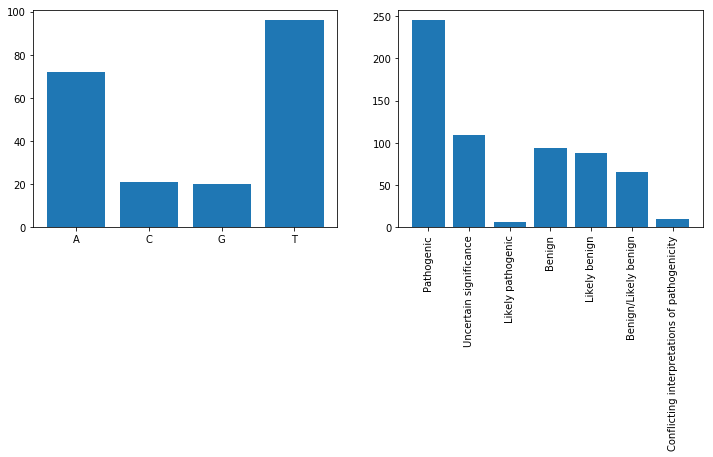

In [11]:
alts = { n : 0 for n in 'ACGT'}
for record in cv.queryVCF(1, 949422, 1049422):
    for alt in record.ALT:
        alt = alt.sequence
        if alt in alts:
            alts[alt] += 1

cImpact = {}
for record in cv.querySummary(1, 949422, 1049422):
    if record.clinicalsignificance not in cImpact:
        cImpact[record.clinicalsignificance] = 0
    cImpact[record.clinicalsignificance] += 1

fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

nbars = axes[0].bar([1,2,3,4], alts.values(), tick_label=list(alts.keys()))

nbars = axes[1].bar([ x + 1 for x in range(len(cImpact.keys())) ], cImpact.values(), tick_label=list(cImpact.keys()))
plt.xticks(rotation=90)
plt.show()

## Access the CADD database
If you have pre-existing files elsewhere, you can tell the system where they are exactly with the "localCopy" argument, and it will make a symbolic link to our local copy.

In [12]:
cadd = biu.db.CADD(localCopy = {"tsv" : "/exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz", 
                                "tsv_tbi" : "/exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz.tbi"})
print(cadd)

CADD object
 Where: /exports/molepi/tgehrmann/data
 Version: GRCh37
 Objects:
  * [ ] scores
 Files:
  * [S] tsv : /exports/molepi/tgehrmann/data/cadd.tsv.bgz -> /exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz
  * [S] tsv_tbi : /exports/molepi/tgehrmann/data/cadd.tsv.bgz.tbi -> /exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz.tbi



D: Same symbolic link already exists for 'tsv'
D: Same symbolic link already exists for 'tsv_tbi'


D: Initializing the object NOW


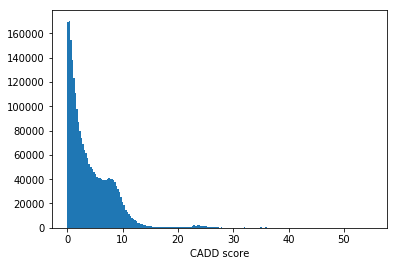

In [13]:
plt.hist([ float(p) for p in cadd.query(1, 0, 1000000).values() ], bins=200)
plt.xlabel("CADD score")
plt.show()

## Access the GnomAD database

In [14]:
gnomad = biu.db.Gnomad(localCopy = { "vcf" : "/exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz",
                                     "vcf_tbi" : "/exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz.tbi"})
print(gnomad)

Gnomad object
 Where: /exports/molepi/tgehrmann/data
 Version: GRCh37
 Objects:
  * [ ] vcf
  * [ ] cov[1]
  * [ ] cov[2]
  * [ ] cov[3]
  * [ ] cov[4]
  * [ ] cov[5]
  * [ ] cov[6]
  * [ ] cov[7]
  * [ ] cov[8]
  * [ ] cov[9]
  * [ ] cov[10]
  * [ ] cov[12]
  * [ ] cov[13]
  * [ ] cov[14]
  * [ ] cov[15]
  * [ ] cov[16]
  * [ ] cov[17]
  * [ ] cov[18]
  * [ ] cov[19]
  * [ ] cov[20]
  * [ ] cov[21]
  * [ ] cov[22]
  * [ ] cov[X]
  * [ ] cov[Y]
 Files:
  * [X] vcf : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.vcf.bgz
  * [X] vcf_tbi : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.vcf.bgz.tbi
  * [X] chr_1_cov : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.coverage.chr.1.tsv.bgz
  * [X] chr_1_cov_tbi : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.coverage.chr.1.tsv.bgz.tbi
  * [ ] chr_2_cov : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.coverage.chr.2.tsv.bgz
  * [ ] chr_2_cov_tbi : /exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.coverage.chr.2.tsv

E: Could not use local copy of 'vcf' as file already exists at '/exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.vcf.bgz'
E: Could not use local copy of 'vcf_tbi' as file already exists at '/exports/molepi/tgehrmann/data/gnomad_GRCh37/gnomad.vcf.bgz.tbi'


D: Initializing the object NOW
D: Initializing the object NOW


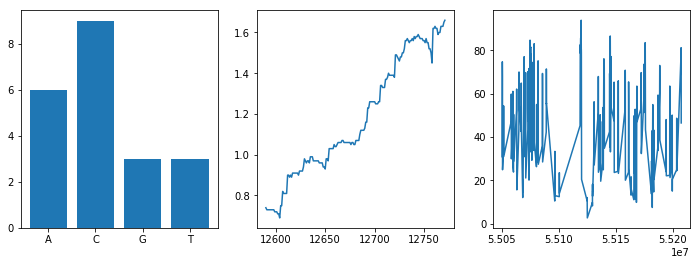

In [15]:
alts = { n : 0 for n in 'ACGT'}
for record in gnomad.queryVCF(1, 12590, 13000):
    for alt in record.ALT:
        alt = alt.sequence
        if alt in alts:
            alts[alt] += 1

x = []; y = []
for record in gnomad.queryCov(1, 12590, 13000, namedtuple=True):
    x.append(int(record.pos))
    y.append(float(record.mean))

gene = "gene:ENSG00000146648"
gEntry = hg.gff.getID(gene)
genex = []; geney=[]
for record in gnomad.queryCov(1, gEntry.start, gEntry.end, namedtuple=True):    
    genex.append(int(record.pos))
    geney.append(float(record.mean))

fig, axes = plt.subplots(figsize=(12,4), ncols=3, nrows=1)
axes = axes.flatten()

nbars = axes[0].bar([1,2,3,4], alts.values(), tick_label=list(alts.keys()))
axes[1].plot(x,y)
axes[2].plot(genex,geney)

plt.show()

## GTeX access
Because GTeX is behind this ugly google login, you have to provide the files yourself.
This can be done by specifying the exact location of the data.
While the other datasets place the files deeper than the 'where' that you specify, GTeX will look EXACTLY for the following files:
 * `'where'/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz`
 * `'where'/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt.gz`
 * `'where'/GTEx_v7_Annotations_SampleAttributesDS.txt`
 * `'where'/GTEx_v7_Annotations_SubjectPhenotypesDS.txt`


In [16]:
where = '/exports/molepi/tgehrmann/data/'
import biu as biu
biu.config.settings.setWhere(where)
gtex = biu.db.GTeX(version="v7",
                   where="/exports/molepi/tgehrmann/data/gtex")
print(gtex)

GTeX object
 Where: /exports/molepi/tgehrmann/data/gtex
 Note: You must provide your own local copies using the 'localCopy' option!
 Version: v7
 Objects:
  * [ ] sAttr
  * [ ] sPheno
 Files:
  * [X] g_tpm : /exports/molepi/tgehrmann/data/gtex/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct.gz
  * [X] t_tpm : /exports/molepi/tgehrmann/data/gtex/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt.gz
  * [X] s_attr : /exports/molepi/tgehrmann/data/gtex/GTEx_v7_Annotations_SampleAttributesDS.txt
  * [X] s_pheno : /exports/molepi/tgehrmann/data/gtex/GTEx_v7_Annotations_SubjectPhenotypesDS.txt



In [17]:
print(gtex.getPersonIDSamples(gtex.getPersonIDs()[0]))
%time gtex.getGeneExpr(gtex.getPersonIDSamples(gtex.getPersonIDs()[0]))

D: Initializing the object NOW


['GTEX-1117F-0226-SM-5GZZ7' 'GTEX-1117F-0426-SM-5EGHI'
 'GTEX-1117F-0526-SM-5EGHJ' 'GTEX-1117F-0626-SM-5N9CS'
 'GTEX-1117F-0726-SM-5GIEN' 'GTEX-1117F-1326-SM-5EGHH'
 'GTEX-1117F-2226-SM-5N9CH' 'GTEX-1117F-2426-SM-5EGGH'
 'GTEX-1117F-2526-SM-5GZY6' 'GTEX-1117F-2826-SM-5GZXL'
 'GTEX-1117F-2926-SM-5GZYI' 'GTEX-1117F-3026-SM-5GZYU'
 'GTEX-1117F-3226-SM-5N9CT']
CPU times: user 1min 2s, sys: 297 ms, total: 1min 2s
Wall time: 1min 2s


,Name,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-3226-SM-5N9CT,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-3026-SM-5GZYU,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2926-SM-5GZYI,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6
0,ENSG00000223972.4,0.10820,0.06407,0.00000,0.00000,0.05381,0.05445,0.02271,0.06331,0.08177,0.07213,0.12580,0.09281,0.00000
1,ENSG00000227232.4,21.40000,13.00000,23.82000,17.53000,18.02000,20.81000,7.44300,19.19000,15.03000,31.46000,25.07000,31.17000,35.71000
2,ENSG00000243485.2,0.16020,0.14230,0.00000,0.00000,0.07969,0.12090,0.15140,0.07032,0.00000,0.00000,0.13970,0.00000,0.00000
3,ENSG00000237613.2,0.05045,0.00000,0.00000,0.05547,0.02510,0.03810,0.03179,0.08861,0.00000,0.00000,0.00000,0.00000,0.03864
4,ENSG00000268020.2,0.00000,0.05771,0.00000,0.00000,0.03231,0.04904,0.00000,0.00000,0.00000,0.00000,0.05666,0.08359,0.00000
5,ENSG00000240361.1,0.00000,0.00000,0.00000,0.00000,0.03255,0.09881,0.00000,0.05745,0.04947,0.00000,0.00000,0.00000,0.00000
6,ENSG00000186092.4,0.00000,0.05953,0.00000,0.07366,0.10000,0.00000,0.04221,0.11770,0.10130,0.00000,0.05845,0.17250,0.00000
7,ENSG00000238009.2,0.23920,0.21250,0.02808,0.19720,0.13390,0.02258,0.07535,0.15750,0.06782,0.17950,0.23480,0.30790,0.06870
8,ENSG00000233750.3,0.18690,0.12080,0.04789,0.11210,0.13530,0.05133,0.16060,0.16420,0.14130,0.10200,0.08896,0.13120,0.15620
9,ENSG00000237683.5,9.46700,2.96400,3.73900,2.32600,2.98000,4.11600,1.44600,8.78600,1.13900,10.40000,4.22400,2.63100,8.98200


In [18]:
pTissues = {}
for i, row in gtex.sAttr.iterrows():
    if row["SMAFRZE"] != "RNASEQ":
        continue
    #fi
    personID = row["SAMPID"].split('-')[1]
    sampleType = row["SMTSD"]
    if personID not in pTissues:
        pTissues[personID] = []
    pTissues[personID].append(sampleType)

indivTissues = sorted(list(set(gtex.sAttr["SMTSD"])))
pairwiseTissueCounts = {}
for personID in pTissues:
    tissues = list(set(pTissues[personID]))
    for i, samplei in enumerate(tissues[:-1]):
        for j, samplej in enumerate(tissues[i+1:]):
            key = (samplei, samplej)
            if key not in pairwiseTissueCounts:
                pairwiseTissueCounts[key] = 0
            pairwiseTissueCounts[(samplei, samplej)] += 1

indivTissuesMap = { t: i for (i,t) in enumerate(list(indivTissues)) }

C = np.zeros([len(indivTissues), len(indivTissues)])
for (t1,t2) in pairwiseTissueCounts:
    C[indivTissuesMap[t1], indivTissuesMap[t2]] = int(pairwiseTissueCounts.get((t1,t2),0) +
                                                  pairwiseTissueCounts.get((t2,t1),0))
    C[indivTissuesMap[t2], indivTissuesMap[t1]] = int(pairwiseTissueCounts.get((t1,t2),0) +
                                                  pairwiseTissueCounts.get((t2,t1),0))

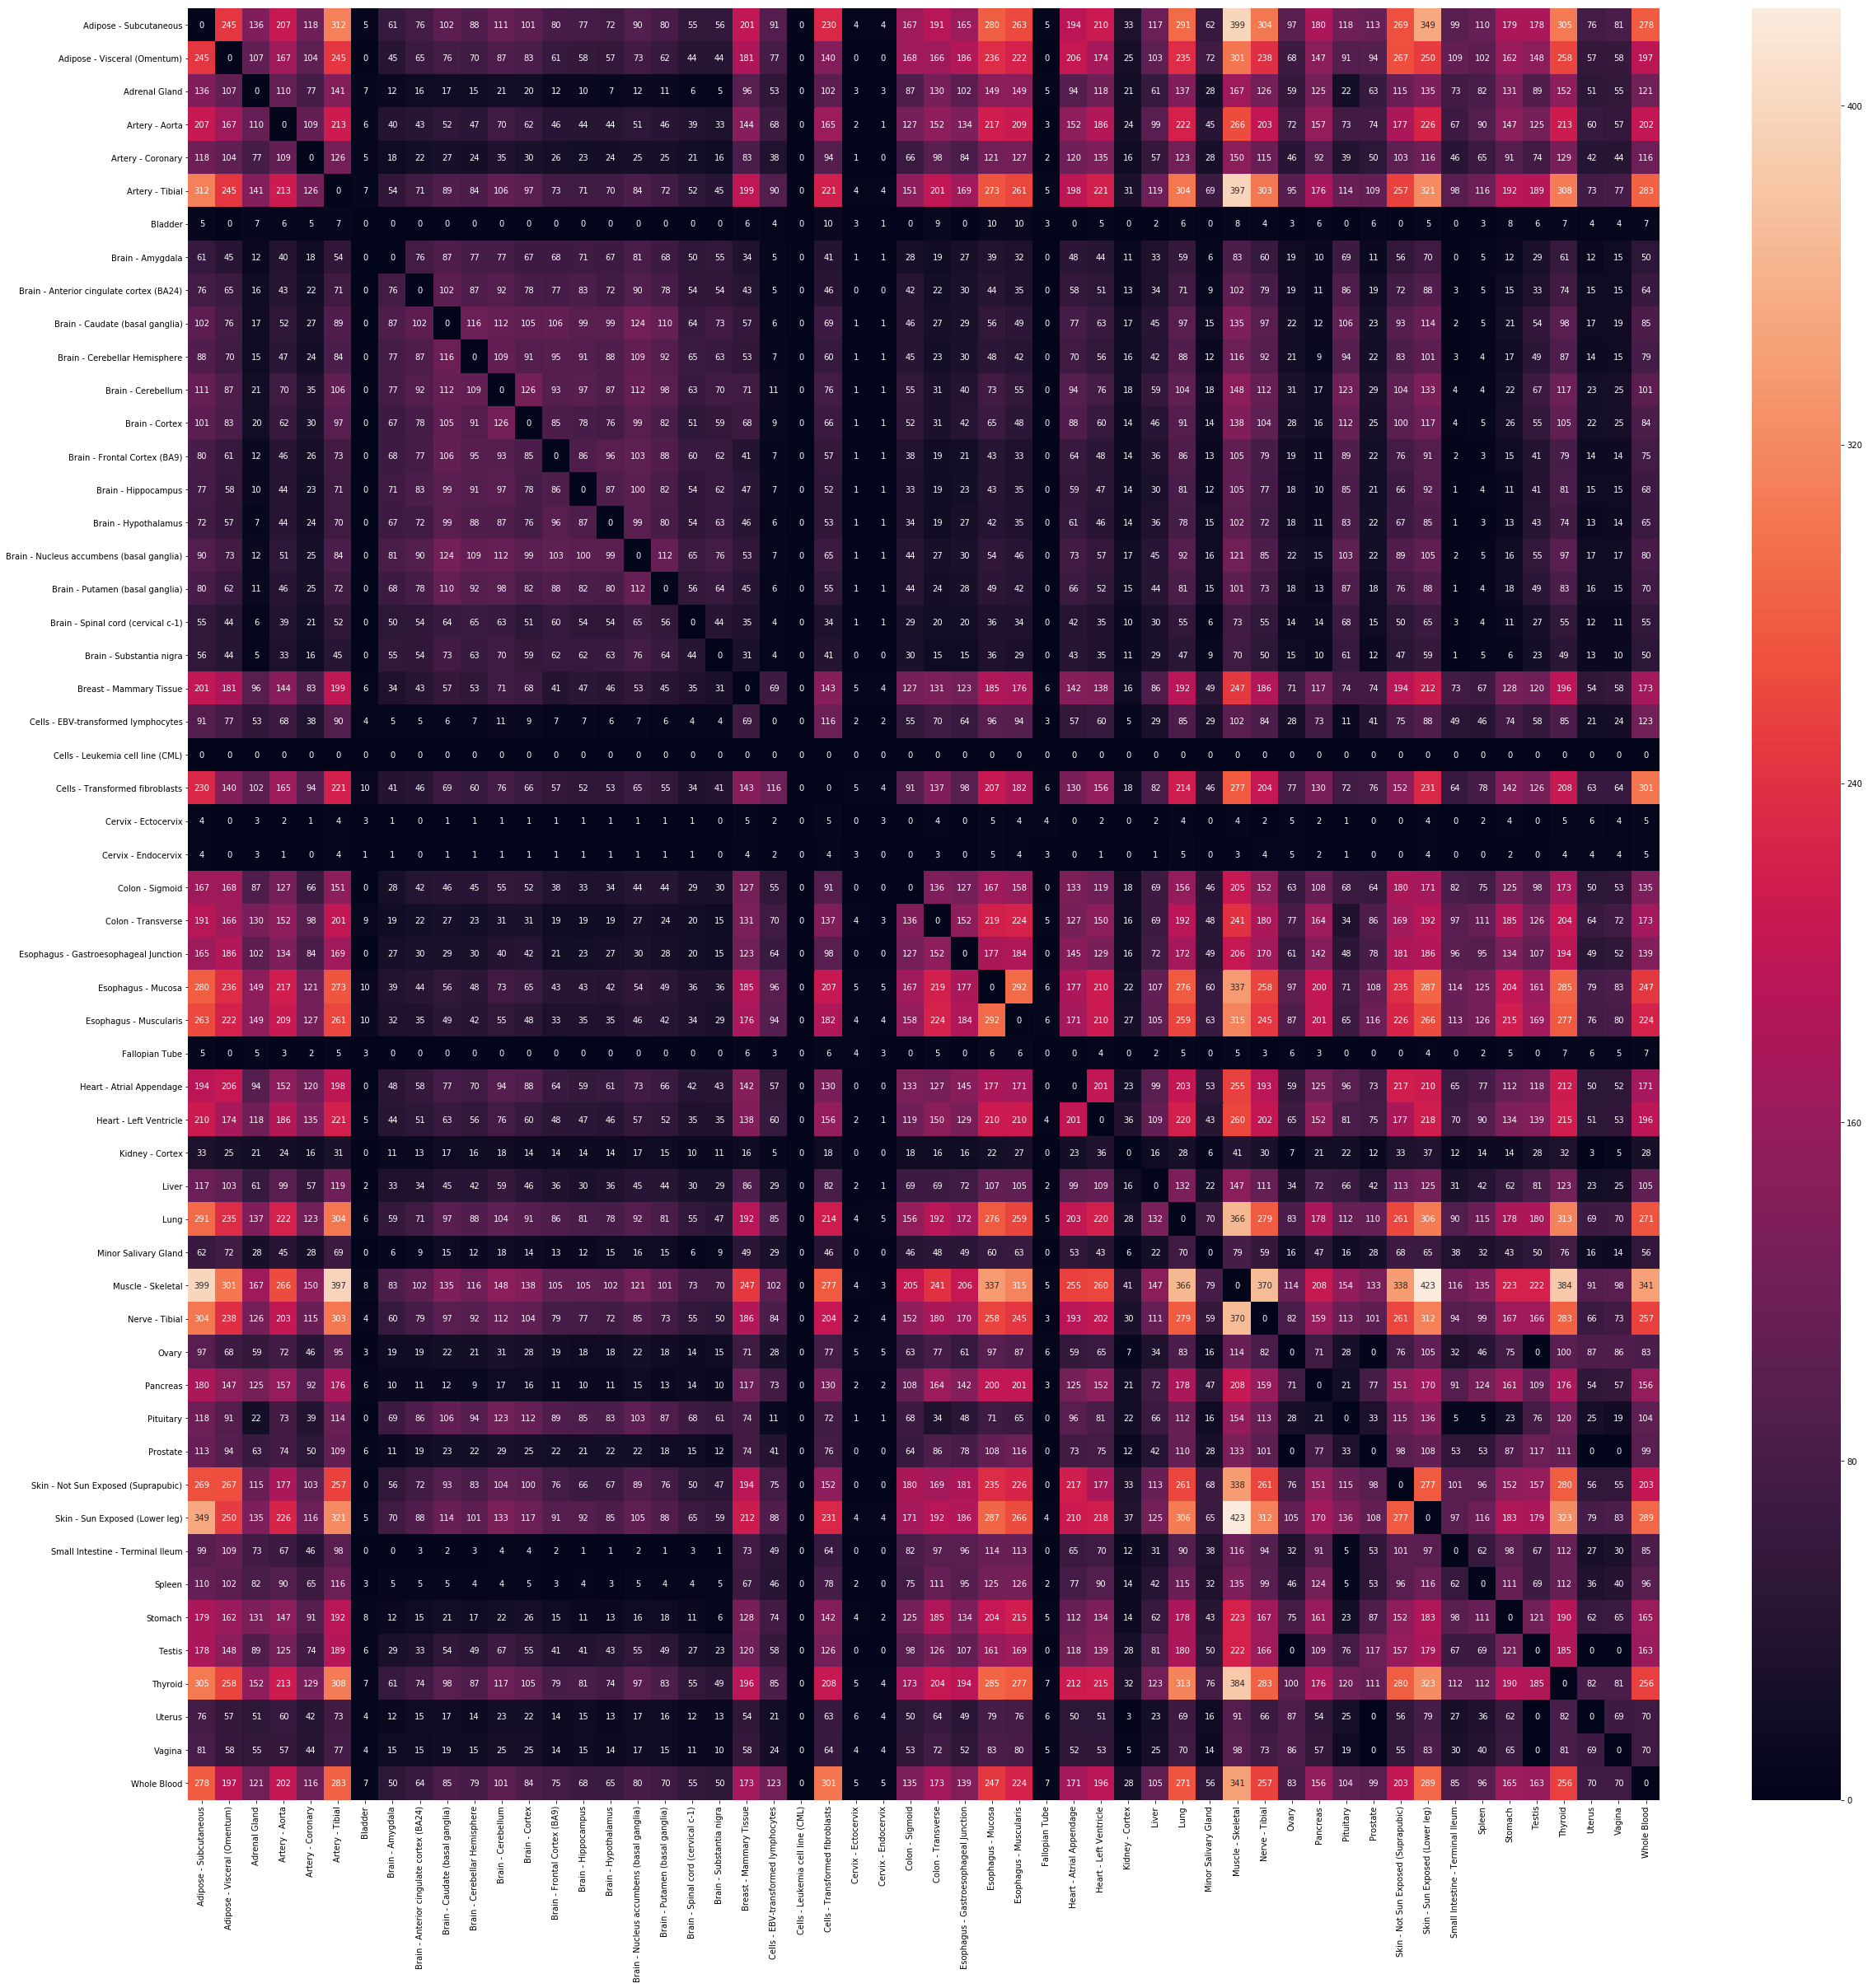

In [19]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(C, ax = ax, xticklabels=indivTissues, yticklabels=indivTissues, annot=True, fmt='.0f')
plt.show()

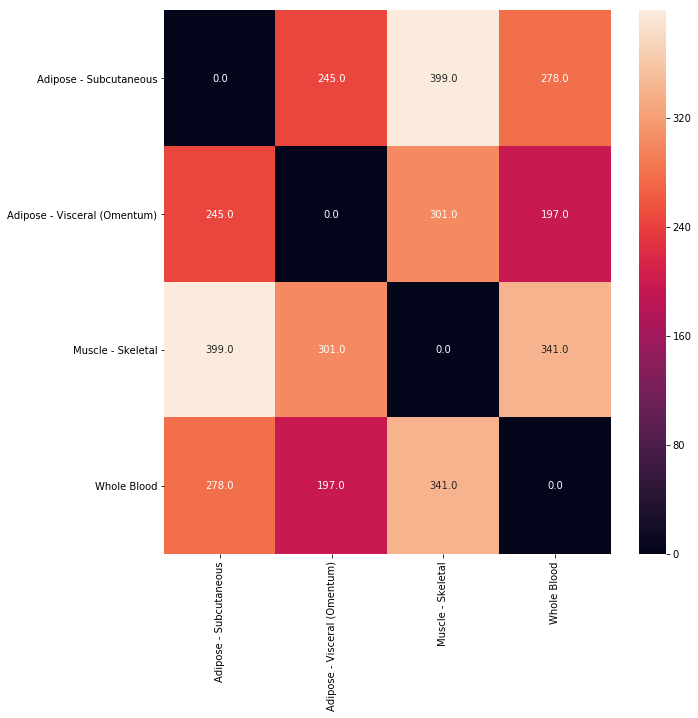

In [20]:
interestTissues = [ 'Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)', 'Muscle - Skeletal', "Whole Blood" ]
interestTissuesIndex = [ indivTissuesMap[t] for t in interestTissues ]

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(C[interestTissuesIndex,:][:,interestTissuesIndex], ax = ax, xticklabels=interestTissues, yticklabels=interestTissues, annot=True, fmt='.1f')
plt.show()

## Reactome access
Doesn't really work yet

In [21]:
#reactome = biu.db.Reactome(where=where + '/reactome')
#print(reactome)
#for r in reactome.getPathway("R-HSA-1236973"):
#    print(r)

## Cosmic access

In [22]:
cosmic = biu.db.Cosmic("t.gehrmann@lumc.nl", "cab847t0")
print(cosmic)

Cosmic object
 Where: /exports/molepi/tgehrmann/data
 Version: current
 Objects:
  * [ ] vcfCoding
  * [ ] vcfNonCoding
 Files:
  * [X] vcfCoding : /exports/molepi/tgehrmann/data/cosmic_current/vcfCoding.vcf.bgz
  * [X] vcfCoding_tbi : /exports/molepi/tgehrmann/data/cosmic_current/vcfCoding.vcf.bgz.tbi
  * [X] vcfNonCoding : /exports/molepi/tgehrmann/data/cosmic_current/vcfNonCoding.vcf.bgz
  * [X] vcfNonCoding_tbi : /exports/molepi/tgehrmann/data/cosmic_current/vcfNonCoding.vcf.bgz.tbi



In [23]:
for r in cosmic.vcfCoding.query(1, 1, 69270):
    print(r)

Record(CHROM=1, POS=35416, REF=A, ALT=[G])
Record(CHROM=1, POS=69224, REF=A, ALT=[C])
Record(CHROM=1, POS=69230, REF=A, ALT=[C])
Record(CHROM=1, POS=69236, REF=A, ALT=[C])
Record(CHROM=1, POS=69270, REF=A, ALT=[G])


D: Initializing the object NOW


In [24]:
for r in cosmic.vcfNonCoding.query(1, 1, 69270):
    print(r)

Record(CHROM=1, POS=10151, REF=T, ALT=[A])
Record(CHROM=1, POS=10175, REF=T, ALT=[A])
Record(CHROM=1, POS=10181, REF=A, ALT=[T])
Record(CHROM=1, POS=10181, REF=A, ALT=[T])
Record(CHROM=1, POS=10237, REF=A, ALT=[C])
Record(CHROM=1, POS=10254, REF=TA, ALT=[T])
Record(CHROM=1, POS=10270, REF=CCCTAA, ALT=[C])
Record(CHROM=1, POS=10333, REF=C, ALT=[T])
Record(CHROM=1, POS=10340, REF=TAACCC, ALT=[T])
Record(CHROM=1, POS=10357, REF=T, ALT=[G])
Record(CHROM=1, POS=10374, REF=C, ALT=[CTTAACCCT])
Record(CHROM=1, POS=10403, REF=A, ALT=[C])
Record(CHROM=1, POS=10403, REF=A, ALT=[C])
Record(CHROM=1, POS=10407, REF=T, ALT=[C])
Record(CHROM=1, POS=10407, REF=T, ALT=[C])
Record(CHROM=1, POS=10408, REF=A, ALT=[AT])
Record(CHROM=1, POS=10423, REF=C, ALT=[G])
Record(CHROM=1, POS=10437, REF=T, ALT=[C])
Record(CHROM=1, POS=10444, REF=T, ALT=[A])
Record(CHROM=1, POS=10464, REF=A, ALT=[T])
Record(CHROM=1, POS=10492, REF=C, ALT=[T])
Record(CHROM=1, POS=10492, REF=C, ALT=[T])
Record(CHROM=1, POS=10492, REF=C, 

D: Initializing the object NOW


Record(CHROM=1, POS=13116, REF=T, ALT=[G])
Record(CHROM=1, POS=13116, REF=T, ALT=[G])
Record(CHROM=1, POS=13118, REF=A, ALT=[G])
Record(CHROM=1, POS=13281, REF=C, ALT=[G])
Record(CHROM=1, POS=13302, REF=C, ALT=[T])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13418, REF=G, ALT=[A])
Record(CHROM=1, POS=13475, REF=CCTGACAGGCAG, ALT=[C])
Record(CHROM=1, POS=13494, REF=A, ALT=[G])
Record(CHROM=1, POS=13507, REF=G, ALT=[A])
Record(CHROM=1, POS=13621, REF=A, ALT=[G])


## Gene mapping

### Do gene mapping with pickled maps
Faster operations, but slow initialization + more memory usage

In [25]:
import biu
hm = biu.maps.Human(where="/exports/molepi/tgehrmann/data/")
print(hm)

def exampleMapping(GMO):
    # GMO : Gene Mapping Object
    symbol = "MTOR"
    geneid = GMO.getSymbolGeneID(symbol)[0]
    print("%s -> %s" % (symbol, geneid))
    symbol = GMO.getGeneIDSymbol(geneid)[0]
    print("%s -> %s" % (geneid, symbol))
    ensembl = GMO.getSymbolEnsembl(symbol)[0]
    print("%s -> %s" % (symbol, ensembl))
    symbol = GMO.getEnsemblSymbol(ensembl)[0]
    print("%s -> %s" % (ensembl, symbol))
#edef

def exampleMappingSilent(GMO):
    # GMO : Gene Mapping Object
    symbol = "MTOR"
    geneid = GMO.getSymbolGeneID(symbol)[0]
    symbol = GMO.getGeneIDSymbol(geneid)[0]
    ensembl = GMO.getSymbolEnsembl(symbol)[0]
    symbol = GMO.getEnsemblSymbol(ensembl)[0]
#edef

HumanMapping object
 Where: /exports/molepi/tgehrmann/data
 Objects:
  * [ ] gene2ensembl
  * [ ] geneInfo
 Files:
  * [X] gene2ensembl : /exports/molepi/tgehrmann/data/humanMappings_gene2ensembl.tsv
  * [X] gene2refseq : /exports/molepi/tgehrmann/data/humanMappings_gene2refseq.tsv
  * [X] geneInfo : /exports/molepi/tgehrmann/data/humanMappings_geneinfo.tsv
  * [ ] uniprotmap : /exports/molepi/tgehrmann/data/humanMappings_uniprotmap.tsv



In [26]:
exampleMapping(hm)

D: Initializing the object NOW
D: Loading the index from pickle


MTOR -> 2475
2475 -> MTOR


D: Initializing the object NOW
D: Loading the index from pickle


MTOR -> ENSG00000198793
ENSG00000198793 -> MTOR


### Mapping with SQLite instead of pickled Maps
Fast initialization, but slower operations.
Because of the high speed initialization, we can perform queries on a larger number of structures, including the gene2refseq index, and the uniprotmap, which is prohibitively large for the map.

In [27]:
where = '/exports/molepi/tgehrmann/data/'
import biu as biu
biu.config.settings.setWhere(where)
print(biu.config.settings.getWhere())
hms = biu.maps.HumanS()
print(hms)

/exports/molepi/tgehrmann/data/
HumanMapping object
 Where: /exports/molepi/tgehrmann/data
 Objects:
  * [X] sqlite
 Files:
  * [X] gene2ensembl : /exports/molepi/tgehrmann/data/humanMappings_gene2ensembl.tsv
  * [X] gene2refseq : /exports/molepi/tgehrmann/data/humanMappings_gene2refseq.tsv
  * [X] geneInfo : /exports/molepi/tgehrmann/data/humanMappings_geneinfo.tsv
  * [ ] uniprotmap : /exports/molepi/tgehrmann/data/humanMappings_uniprotmap.tsv
  * [X] sqlite_db : /exports/molepi/tgehrmann/data/humanMappings_db.sqlite



D: Initializing the object NOW


In [28]:
exampleMapping(hms)

MTOR -> 2475
2475 -> MTOR
MTOR -> ENSG00000198793
ENSG00000198793 -> MTOR


### Compare Map vs SQLite speeds

In [29]:
print("Map Lookup")
%timeit exampleMappingSilent(hm)
print("SQLite lookup")
%timeit exampleMappingSilent(hms)

Map Lookup
30.7 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
SQLite lookup
297 ms ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## HAGR access
Unlike others, HAGR is downloaded already entirely when the class is initiated (because they are in ZIP files, and I don't have a nice solution for this yet)

In [30]:
import biu as biu
hagr = biu.db.HAGR(where = '/exports/molepi/tgehrmann/data/')
print(hagr)

HAGR object
 Where: /exports/molepi/tgehrmann/data
 Objects:
  * [ ] human_genes
  * [ ] model_genes
  * [ ] longevity_genes
  * [ ] drug_age
  * [ ] an_age
 Files:
  * [X] human_genes.zip : /exports/molepi/tgehrmann/data/hagr_human_genes.zip
  * [X] model_genes.zip : /exports/molepi/tgehrmann/data/hagr_model_genes.zip
  * [X] longevity_map.zip : /exports/molepi/tgehrmann/data/hagr_longevity_map.zip
  * [X] drugage.zip : /exports/molepi/tgehrmann/data/hagr_drugage.zip
  * [X] anage.zip : /exports/molepi/tgehrmann/data/hagr_anage.zip
  * [X] human_genes : /exports/molepi/tgehrmann/data/hagr_human_genes.zip.unpacked/genage_human.csv
  * [X] model_genes : /exports/molepi/tgehrmann/data/hagr_model_genes.zip.unpacked/genage_models.csv
  * [X] longevity_map : /exports/molepi/tgehrmann/data/hagr_longevity_map.zip.unpacked/longevity.csv
  * [X] drugage : /exports/molepi/tgehrmann/data/hagr_drugage.zip.unpacked/drugage.csv
  * [X] anage : /exports/molepi/tgehrmann/data/hagr_anage.zip.unpacked/a

In [31]:
hagr.human_genes

D: Initializing the object NOW


,GenAge ID,symbol,aliases,name,entrez gene id,uniprot,why,band,location start,location end,orientation,acc promoter,acc orf,acc cds,references,orthologs
0,1,GHR,GHBP,growth hormone receptor,2690,GHR_HUMAN,mammal,5p13-p12,42423775,42721878,1,NaN,NM_000163,NP_000154,"12933651,10875265,2233903,10895047,12392795,14...","Ghr;Mus musculus,Ghr;Rattus norvegicus,ghrb;Da..."
1,2,GHRH,GHRF,growth hormone releasing hormone,2691,SLIB_HUMAN,mammal,20q11.2,37251086,37256896,-1,HS_GHRH,NM_021081,NP_066567,"114,431,811,239,279,000,000,000,000,000,000,00...","Ghrh;Mus musculus,Ghrh;Rattus norvegicus"
2,3,SHC1,p66 ShcA SHC,SHC (Src homology 2 domain containing) transfo...,6464,SHC1_HUMAN,mammal,1q21,154962298,154974483,-1,NaN,NM_003029,NP_003020,"11884717,12483226,10580504,12032825,12571362,1...","Shc1;Mus musculus,Shc;Drosophila melanogaster,..."
3,4,POU1F1,GHF-1 POU1F1a PIT1,POU class 1 homeobox 1,5449,PIT1_HUMAN,mammal,3p11,87259633,87276587,-1,NaN,NM_000306,NP_000297,"1,509,263,113,716,190,000,000,000,000,000,000,...","Pou1f1;Mus musculus,Pou1f1;Rattus norvegicus,p..."
4,5,PROP1,NaN,PROP paired-like homeobox 1,5626,PROP1_HUMAN,mammal,5q35.3,177992235,177996242,-1,NaN,NM_006261,NP_006252,##############################################...,"Prop1;Mus musculus,CG32532;Drosophila melanoga..."
5,6,TP53,p53 LFS1,tumor protein p53,7157,P53_HUMAN,"mammal,model,cell",17p13.1,7668401,7687550,-1,HS_TP53,NM_000546,NP_000537,"9733514,9733515,12142523,12115733,12533509,120...","LOC100910954;Rattus norvegicus,Trp53;Mus muscu..."
6,7,TERC,TR hTR TRC3 DKCA1 PFBMFT2 SCARNA19,telomerase RNA component,7012,NaN,"mammal,cell",3q26,169764609,169765060,-1,NaN,NR_001566,NaN,"12540856,7544491,9454332,9335332,10089885,2655...",NaN
7,8,TERT,TRT TP2 TCS1 hEST2 EST2,telomerase reverse transcriptase,7015,TERT_HUMAN,"cell,functional",5p15.33,1253147,1295069,-1,NaN,NM_003219,NP_003210,"8978029,9110970,9454332,9288757,11387197,12034...","trt1;Schizosaccharomyces pombe,Tert;Mus muscul..."
8,9,ATM,TEL1 TELO1 ATA ATDC ATC ATD,ATM serine/threonine kinase,472,ATM_HUMAN,mammal,11q22-q23,108222832,108369099,1,NaN,NM_000051,NP_000042,"12540856,9733514,9733515,12142523,9363685,1003...","Atm;Mus musculus,tefu;Drosophila melanogaster,..."
9,10,PLAU,URK UPA,"plasminogen activator, urokinase",5328,UROK_HUMAN,mammal,10q22.2,73911104,73917500,1,HS_PLAU,NM_002658,NP_002649,"12,898,287,129,544,800,000,000,000,000,000,000...","Plau;Mus musculus,Plau;Rattus norvegicus,svh-1..."


## Access GO annotations

In [32]:
where = '/exports/molepi/tgehrmann/data/'
import biu as biu
biu.config.settings.setWhere(where)
print(biu.config.settings.getWhere())
go = biu.db.GO()
print(go)

/exports/molepi/tgehrmann/data/
GO object
 Where: /exports/molepi/tgehrmann/data
 Version: human
 Objects:
  * [ ] _annots
 Files:
  * [X] gaf : /exports/molepi/tgehrmann/data/geneOntology_human/geneannots.gaf.gz



In [33]:
print("Number of genes annotated with GO:0002250: %d" % len(go.getAnnotated("GO:0002250")))

print("Number of annotations for P78540: %d" % len(go.getAnnots("P78540")))

D: Initializing the object NOW
/home/tgehrmann/repos/BIU/biu/structures/lazyObject.py:13: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  self.__init_obj()


Number of genes annotated with GO:0002250: 229
Number of annotations for P78540: 27


## Access KEGG annotations

In [44]:
where = '/exports/molepi/tgehrmann/data/'
import biu as biu
biu.config.settings.setWhere(where)
print(biu.config.settings.getWhere())
kegg = biu.db.KEGG()
hms = biu.maps.HumanS()

/exports/molepi/tgehrmann/data/


D: Initializing the object NOW


In [45]:
print(kegg)

KEGG object
 Where: /exports/molepi/tgehrmann/data
 Version: human
 Objects:
  * [ ] _orgMap
  * [ ] _featureData
 Files:
  * [X] org_map : /exports/molepi/tgehrmann/data/kegg_human/org_map.tsv
  * [X] feature_data : /exports/molepi/tgehrmann/data/kegg_human/feature_data.sqlite



In [46]:
print("Number of pathways MTOR is in: %d" % len(kegg.getGenePathways(hms.getSymbolGeneID("MTOR")[0])))

print("Number of genes in path:hsa05230: %d" % len(kegg.getPathwayGenes("path:hsa05230")))

Number of pathways MTOR is in: 37
Number of genes in path:hsa05230: 65


D: Initializing the object NOW
D: Loading the index from pickle


In [37]:
print(kegg.getPathwayInfo("hsa05230"))

D: Initializing the object NOW
D: Downloading via REST from 'http://rest.kegg.jp/get/path:hsa05230'


ENTRY       hsa05230                    Pathway
NAME        Central carbon metabolism in cancer - Homo sapiens (human)
DESCRIPTION Malignant transformation of cells requires specific adaptations of cellular metabolism to support growth and survival. In the early twentieth century, Otto Warburg established that there are fundamental differences in the central metabolic pathways operating in malignant tissue. He showed that cancer cells consume a large amount of glucose, maintain high rate of glycolysis and convert a majority of glucose into lactic acid even under normal oxygen concentrations (Warburg's Effects). More recently, it has been recognized that the 'Warburg effect' encompasses a similarly increased utilization of glutamine. From the intermediate molecules provided by enhanced glycolysis and glutaminolysis, cancer cells synthesize most of the macromolecules required for the duplication of their biomass and genome. These cancer-specific alterations represent a major consequence 

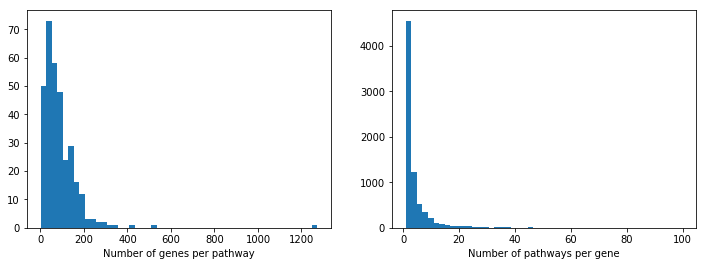

In [38]:
fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

# How many genes are there per kegg pathway?
genesPerPathway = [ len(kegg.getPathwayGenes(p)) for p in kegg.getPathways() ]
pathwaysPerGene = [ len(kegg.getGenePathways(g)) for g in kegg.getGenes() ]

axes[0].hist(genesPerPathway, bins=50)
axes[0].set_xlabel("Number of genes per pathway")
axes[1].hist(pathwaysPerGene, bins=50)
axes[1].set_xlabel("Number of pathways per gene")
plt.show()

## Access LLS data

In [39]:
lls = biu.db.LLS()

In [40]:
for r in lls.queryRegions([ ("1", 100, 100000), ("1", 100, 100000)]):
    print(r)

D: Initializing the object NOW


Record(CHROM=1, POS=10484, REF=C, ALT=[T])
Record(CHROM=1, POS=10493, REF=C, ALT=[A])
Record(CHROM=1, POS=11298, REF=GCCG, ALT=[GACTA])
Record(CHROM=1, POS=11305, REF=CA, ALT=[CAA])
Record(CHROM=1, POS=11313, REF=GG, ALT=[GGCCCTCTTGCTTAGAG])
Record(CHROM=1, POS=11319, REF=CTTG, ALT=[CCCCT])
Record(CHROM=1, POS=11326, REF=A, ALT=[G])
Record(CHROM=1, POS=11457, REF=C, ALT=[G])
Record(CHROM=1, POS=13273, REF=G, ALT=[C])
Record(CHROM=1, POS=16257, REF=G, ALT=[C])
Record(CHROM=1, POS=17147, REF=G, ALT=[A])
Record(CHROM=1, POS=20095, REF=AAACAG, ALT=[AC])
Record(CHROM=1, POS=21580, REF=C, ALT=[T])
Record(CHROM=1, POS=22158, REF=A, ALT=[G])
Record(CHROM=1, POS=23975, REF=G, ALT=[A])
Record(CHROM=1, POS=26996, REF=A, ALT=[G])
Record(CHROM=1, POS=30855, REF=T, ALT=[C])
Record(CHROM=1, POS=30859, REF=TGTG, ALT=[TCTG])
Record(CHROM=1, POS=30866, REF=CCCTCT, ALT=[CC, CTGTCT, CTGTCTCT])
Record(CHROM=1, POS=30892, REF=CATT, ALT=[CTC])
Record(CHROM=1, POS=30920, REF=C, ALT=[A])
Record(CHROM=1, POS=30

## Access BBMRI data

In [41]:
bbmri = biu.db.BBMRI()

## Store some variables persistently in a SQLite database

In [42]:
pDict = biu.formats.SQLDict("test")
print(pDict)

SQLDict object
 Where: /exports/molepi/tgehrmann/data
 Objects:
  * [ ] _sqlDict
 Files:
  * [X] sqlite_db : /exports/molepi/tgehrmann/data/sqlDict/test.sqlDict.sqlite



In [43]:
pDict["test"] = { 5: "hello", "aha" : [ 1, 4, "345"]}
print("test -> ", pDict["test"])
print("yest -> ", pDict["yest"])

for x in pDict:
    print(x)

test ->  {5: 'hello', 'aha': [1, 4, '345']}
yest ->  None
test


D: Initializing the object NOW


### Access miRmine database

In [1]:
import biu
where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

In [2]:
mir = biu.db.MiRmine()

In [5]:
print(mir)

MiRmine object
 Where: /exports/molepi/tgehrmann/data
 Objects:
  * [X] _tissues
  * [X] _cellLines
  * [X] _info
 Files:
  * [X] miRmine.zip : /exports/molepi/tgehrmann/data/miRmine/miRmine.zip
  * [X] cellLines : /exports/molepi/tgehrmann/data/miRmine/miRmine.zip.unpacked/miRmine-cell-lines.xlsx
  * [X] tissues : /exports/molepi/tgehrmann/data/miRmine/miRmine.zip.unpacked/miRmine-tissues.xlsx
  * [X] info : /exports/molepi/tgehrmann/data/miRmine/miRmine.zip.unpacked/miRmine-info.txt



In [4]:
mir.getExpr(["DRX003170", "DRX003171", "DRX017209"])

D: Initializing the object NOW
D: Initializing the object NOW
D: Initializing the object NOW


,matureID,precursorID,DRX003170,DRX003171,DRX017209
0,hsa-let-7a-2-3p,hsa-let-7a-2,0,0,0
1,hsa-let-7a-3p,hsa-let-7a-1,0.9,1.9,86.4
2,hsa-let-7a-3p,hsa-let-7a-3,0.9,1.9,85.5
3,hsa-let-7a-5p,hsa-let-7a-2,71234.1,81219.4,16467.9
4,hsa-let-7a-5p,hsa-let-7a-3,71231,81214.2,16460.1
5,hsa-let-7a-5p,hsa-let-7a-1,71221.7,81201.8,16462.5
6,hsa-let-7b-3p,hsa-let-7b,3,4.3,43.4
7,hsa-let-7b-5p,hsa-let-7b,102678,99529.7,1500.9
8,hsa-let-7c-3p,hsa-let-7c,0,0,2.2
9,hsa-let-7c-5p,hsa-let-7c,6393.5,8186.8,2784.7


In [14]:
set(mir._info["Tissue"][mir._info["Tissue"].apply(lambda x: not(pd.isnull(x)))].values)

{'Bladder',
 'Blood',
 'Brain',
 'Breast',
 'Hair follicle',
 'Liver',
 'Lung',
 'Nasopharynx',
 'Pancreas',
 'Placenta',
 'Plasma',
 'Saliva',
 'Semen',
 'Serum',
 'Sperm',
 'Testis'}

## Use pipelines

### Use the VEP pipeline

In [9]:
import biu as biu
where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

lls = biu.db.LLS()
varList = list([ r for r in lls.query(1, 10483, 10495)])
vep = biu.pipelines.VEP(varList)
vep.getAnnotations()

D: Initializing the object NOW
Building DAG of jobs...
Nothing to be done.
Complete log: /home/tgehrmann/repos/BIU/.snakemake/log/2018-03-12T173739.877321.snakemake.log


,variant_id,location,allele,gene,feature,feature_type,consequence,cdna_position,cds_position,protein_position,amino_acids,codons,existing_variation,extra
0,1-10484-C-T,1:10484,T,ENSG00000223972,ENST00000450305,Transcript,upstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=1526;STRAND=1
1,1-10484-C-T,1:10484,T,ENSG00000223972,ENST00000456328,Transcript,upstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=1385;STRAND=1
2,1-10484-C-T,1:10484,T,ENSG00000227232,ENST00000488147,Transcript,downstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=3920;STRAND=-1
3,1-10493-C-A,1:10493,A,ENSG00000223972,ENST00000450305,Transcript,upstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=1517;STRAND=1
4,1-10493-C-A,1:10493,A,ENSG00000223972,ENST00000456328,Transcript,upstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=1376;STRAND=1
5,1-10493-C-A,1:10493,A,ENSG00000227232,ENST00000488147,Transcript,downstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=3911;STRAND=-1


### Use the LiftOver Pipeline

In [1]:
import biu as biu
where = '/exports/molepi/tgehrmann/data/'
biu.config.settings.setWhere(where)

lls = biu.db.LLS()
varList = [ (r.CHROM, r.POS-1, r.POS) for r in lls.query(5, 42423775, 42426000)]
varLift = biu.pipelines.LiftOver(varList)
varLift.getLiftOver()

D: Initializing the object NOW
Building DAG of jobs...
Nothing to be done.
Complete log: /home/tgehrmann/repos/BIU/.snakemake/log/2018-03-13T084858.660445.snakemake.log


[('5', 42423901, 42423902),
 ('5', 42423967, 42423968),
 ('5', 42424136, 42424137),
 ('5', 42424179, 42424180),
 ('5', 42424190, 42424191),
 ('5', 42424204, 42424205),
 ('5', 42424224, 42424225),
 ('5', 42424246, 42424247),
 ('5', 42424270, 42424271),
 ('5', 42424297, 42424298),
 ('5', 42424317, 42424318),
 ('5', 42424351, 42424352),
 ('5', 42424359, 42424360),
 ('5', 42424387, 42424388),
 ('5', 42424395, 42424396),
 ('5', 42424407, 42424408),
 ('5', 42424436, 42424437),
 ('5', 42424455, 42424456),
 ('5', 42424481, 42424482),
 ('5', 42424592, 42424593),
 ('5', 42424620, 42424621),
 ('5', 42424633, 42424634),
 ('5', 42424661, 42424662),
 ('5', 42424674, 42424675),
 ('5', 42424718, 42424719),
 ('5', 42424780, 42424781),
 ('5', 42424835, 42424836),
 ('5', 42424854, 42424855),
 ('5', 42424952, 42424953),
 ('5', 42424960, 42424961),
 ('5', 42424966, 42424967),
 ('5', 42425009, 42425010),
 ('5', 42425041, 42425042),
 ('5', 42425078, 42425079),
 ('5', 42425109, 42425110),
 ('5', 42425122, 424

In [6]:
varLift.getLiftOver().values

array([['5', 42423901, 42423902, 0],
       ['5', 42423967, 42423968, 1],
       ['5', 42424136, 42424137, 2],
       ['5', 42424179, 42424180, 3],
       ['5', 42424190, 42424191, 4],
       ['5', 42424204, 42424205, 5],
       ['5', 42424224, 42424225, 6],
       ['5', 42424246, 42424247, 7],
       ['5', 42424270, 42424271, 8],
       ['5', 42424297, 42424298, 9],
       ['5', 42424317, 42424318, 10],
       ['5', 42424351, 42424352, 11],
       ['5', 42424359, 42424360, 12],
       ['5', 42424387, 42424388, 13],
       ['5', 42424395, 42424396, 14],
       ['5', 42424407, 42424408, 15],
       ['5', 42424436, 42424437, 16],
       ['5', 42424455, 42424456, 17],
       ['5', 42424481, 42424482, 18],
       ['5', 42424592, 42424593, 19],
       ['5', 42424620, 42424621, 20],
       ['5', 42424633, 42424634, 21],
       ['5', 42424661, 42424662, 22],
       ['5', 42424674, 42424675, 23],
       ['5', 42424718, 42424719, 24],
       ['5', 42424780, 42424781, 25],
       ['5', 42424835,

In [2]:
print(lls)

LLS object
 Where: /exports/molepi/LLSSEQ
 Version: current
 Objects:
  * [ ] vcf[1]
  * [ ] vcf[2]
  * [ ] vcf[3]
  * [ ] vcf[4]
  * [X] vcf[5]
  * [ ] vcf[6]
  * [ ] vcf[7]
  * [ ] vcf[8]
  * [ ] vcf[9]
  * [ ] vcf[10]
  * [ ] vcf[11]
  * [ ] vcf[12]
  * [ ] vcf[13]
  * [ ] vcf[14]
  * [ ] vcf[15]
  * [ ] vcf[16]
  * [ ] vcf[17]
  * [ ] vcf[18]
  * [ ] vcf[19]
  * [ ] vcf[20]
  * [ ] vcf[21]
  * [ ] vcf[22]
  * [ ] vcf[M]
  * [ ] vcf[X]
  * [ ] vcf[Y]
 Files:
  * [X] vcf_1 : /exports/molepi/LLSSEQ/tbx/merged.chr1.vcf.bgz
  * [X] vcf_1_tbi : /exports/molepi/LLSSEQ/tbx/merged.chr1.vcf.bgz.tbi
  * [X] vcf_2 : /exports/molepi/LLSSEQ/tbx/merged.chr2.vcf.bgz
  * [X] vcf_2_tbi : /exports/molepi/LLSSEQ/tbx/merged.chr2.vcf.bgz.tbi
  * [X] vcf_3 : /exports/molepi/LLSSEQ/tbx/merged.chr3.vcf.bgz
  * [X] vcf_3_tbi : /exports/molepi/LLSSEQ/tbx/merged.chr3.vcf.bgz.tbi
  * [X] vcf_4 : /exports/molepi/LLSSEQ/tbx/merged.chr4.vcf.bgz
  * [X] vcf_4_tbi : /exports/molepi/LLSSEQ/tbx/merged.chr4.vcf.bgz.tb